In [32]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def json_fn_to_dict(fn):
    with open(fn, "r") as f:
        d = json.load(f)

    return d

def prep_dict(d):
    d = {k: [v] for k, v in d.items()}

    d["filename"] = [Path(d["data_source_path"][0]).stem]

    return d

def lazy_prep_dict(fn):
    d = json_fn_to_dict(fn)
    d = prep_dict(d)

    return d


def dicts_to_df(dicts):
    df = pd.DataFrame(dicts[0])

    for d in dicts[1:]:
        # make the new dataframe
        new_df = pd.DataFrame(d)

        # if not all columns of the new df are in the old df:
        for c in new_df.columns:
            if c not in df.columns:
                df[c] = [np.nan]*len(df)

        # if not all columns of the old df are in the new df:
        for c in df.columns:
            if c not in new_df.columns:
                new_df[c] = [np.nan]

        assert all(c in new_df.columns for c in df)
        assert all(c in df.columns for c in new_df)

        df = pd.concat([df, new_df], ignore_index=True)

    return df

In [50]:
log_dir = Path(r"C:\Users\Flin\OneDrive - TU Eindhoven\Flin\Flin\01 - Uni\00_Internship\Nokia\00_Programming\forecasting\logs")
fns = [fn for fn in log_dir.iterdir() if fn.is_file()]


In [51]:
fns = [fn for fn in fns if int(fn.stem.split("_")[0]) >= 196]
fns

[WindowsPath('C:/Users/Flin/OneDrive - TU Eindhoven/Flin/Flin/01 - Uni/00_Internship/Nokia/00_Programming/forecasting/logs/196_h=2_CustomLSTM.json'),
 WindowsPath('C:/Users/Flin/OneDrive - TU Eindhoven/Flin/Flin/01 - Uni/00_Internship/Nokia/00_Programming/forecasting/logs/197_h=2_CustomProphet.json')]

In [52]:

ds = [lazy_prep_dict(fn) for fn in fns]

df = dicts_to_df(ds)

C:\Users\Flin\AppData\Local\Temp\ipykernel_11696\907985719.py:47: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([df, new_df], ignore_index=True)


In [53]:
df

,time_before_fit,time_to_fit,x,y,time_to_predict,yhat,features,data_source_path,horizon,model,...,swa_enabled,swa_start,rolling_prediction,tiny_test,os,time_at_saving,filename,weekly_seasonality,daily_seasonality,rolling_predict_rows_to_refit
0,'Thu Nov 17 15:15:06 2022',165.557323,"[2016-08-14 00:45:00, 2016-08-14 01:00:00, 201...","[-0.7279244574801578, -0.7279244574801578, -0....",8.551672,"[-0.610619068145752, -0.608253002166748, -0.61...","[year, month_sines, month_cosines, hour_sines,...",datasets\train\industrial\h=2_industrial_2016_...,2,CustomLSTM,...,1.0,1.0,True,False,win32,'Thu Nov 17 15:18:01 2022',h=2_industrial_2016_LG_1,NaN,NaN,NaN
1,'Thu Nov 17 15:21:04 2022',4.332422,"[2016-10-22 23:00:00, 2016-10-22 23:15:00, 201...","[-0.7505275440459777, -0.776184274510405, -0.7...",43.841379,"[-0.6198743587095262, -0.6113679308501234, -0....","[ds, a_load_profile, m_load_profile, a_is_week...",datasets\train\industrial\h=2_industrial_2016_...,2,CustomProphet,...,NaN,NaN,True,False,win32,'Thu Nov 17 15:21:52 2022',h=2_industrial_2016_LG_1,20.0,30.0,384.0


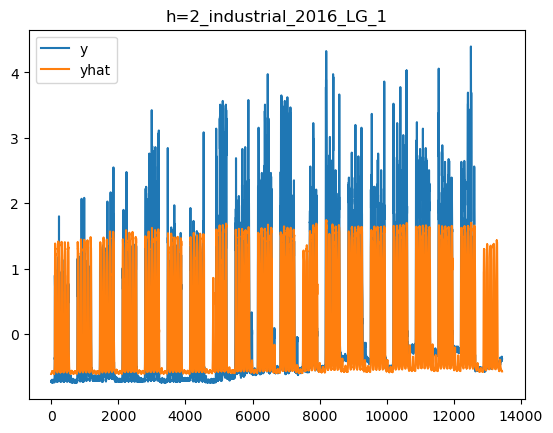

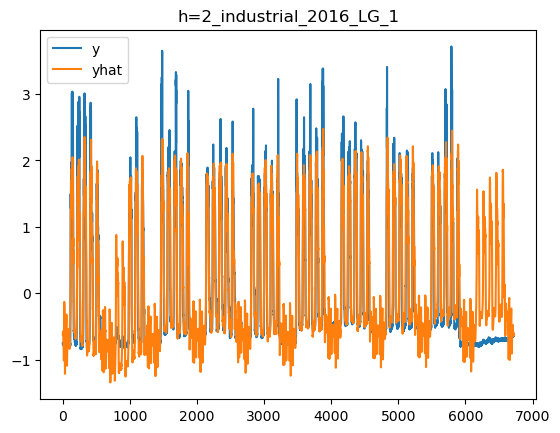

In [54]:
for i, row in df.iterrows():
    x = row["x"]
    x_ints = list(range(len(x)))

    y = row["y"]
    yhat = row["yhat"]
    fn = row["filename"]

    plt.plot(y, label="y")
    plt.plot(yhat, label="yhat")
    plt.legend()
    plt.title(fn)
    plt.show()

In [8]:
x[0]

'2016-01-15 00:15:00'